# Project 1 - Data Scientist Job Market (US)

For those who are actively looking for data scientist jobs in the U.S., the best news this month is the LinkedIn Workforce Report August 2018. According to the report, there is a shortage of 151,717 people with data science skills, with particularly acute shortages in New York City, San Francisco Bay Area and Los Angeles.

To help job hunters (including me) to better understand the job market, I scraped Indeed website and collected information of 7,000 data scientist jobs around the U.S. on August 3rd. The information that I collected are: Company Name, Position Name, Location, Job Description, and Number of Reviews of the Company.

Source: https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us?select=alldata.csv

## To Dos:
1. Create a repo on GitHub - <span style="color:green">done</span>
2. Create a jupyter notebook - <span style="color:green">done</span>
3. What wrangling steps we want to do on each column - <span style="color:green">done</span>
<br>
    3.1 Define the key words we want to extract from description - <span style="color:green">done</span>
    <br>
    3.2 Find Regexs for it
    <br>
4. What insights we want to gather (e.g. company vs locations) - <span style="color:green">done</span>
<br>
    4.1 How we want to present it (which plots to use) - <span style="color:green">done</span>

### 3. What wrangling steps we want to do on each column

#### Steps

- standardize column headers
- check null values (how many are there, etc)
    - can we replace them
    - can we drop them
- standardize column 'positions'
    - find unique values
    - harmonize them
- standardize column 'company'
    - check for same description just wirtten differently/ typos
    - correct them
- standardize column 'location'
    - split up into new columns (State, etc.)
- extract words from column 'desrciption'
    - use boolean columns with True or False 

#### Key words to look for in description

Use re.findall()
<br>
<br>
**We decided to focus on 3 Key word: languages, degrees and seniority level to not overwhelm the todos***

**Languages:**
<br>
  - Python
  - C
  - C ++
  - R
  - Perl
  - Java
    <br>
    
**Degrees:**
<br>
  - Bachelor / BA /BS 
        * Computer Science, Economics, Data Science, 
  - Master /MA
    <br>
    
**Seniotiry Level:**
  - Junior
  - Senior
    <br>
    
**Tools:**
<br>
  - Tableau/QlikSense, PoerBI, Looker
    <br>
    
**Skills:**
<br>
  - Big Data
  - structured /un strcutured data
  - discover pattern
  - model / modeling
  - advanced analystics
  - 5+ years of Predictive Analytics
  - Statistical Modeling
  - Machine Learning
    <br>

    
**Programms:**
<br>
  - Hadoop, Oracle, SQL
    <br>
    
**Business Functions:**
<br>
  - Sales, Marketing, Supply Chain, Manufacturing 



#### RegEx to get those

### 4. What insights we want to gather (e.g. company vs locations)

### Insights & presentation options

**Giving overview of data:**
<br>
- job titels -> wordcloud (https://www.python-graph-gallery.com/wordcloud/)<br>
<br>
- most required skills -> sns.countplot 
<br>
<br>
- most required languages -> sns.countplot or treemap (https://www.python-graph-gallery.com/treemap/)
<br>
<br>
- most required tools -> sns.countplot
<br>
<br>
- ranking what is most important skills vs languages vs tools -> sns.countplot 
<br>
<br>
- locations -> bubble map (https://www.python-graph-gallery.com/bubble-map/)
<br>
<br>
- companies -> donut plot (https://www.python-graph-gallery.com/donut-plot/)
<br>
<br>

**Showing relations between the columns:**
<br>
- all together (job titel, degree, company, location, languages, skills, tools) -> heatmap
<br>
<br>
- degree vs job titel (degree vs company) -> -> scatterplot seaborn 
<br>
<br>
- location vs job titel (company vs location) -> scatterplot seaborn
<br>
<br>
- tools vs job titel -> scatterplot seaborn
<br>
<br>
- languages vs job titel -> scatterplot seaborn
<br>
<br>
- skills vs job titel -> scatterplot seaborn
<br>
<br>


In [15]:
ls

Data/           Project1.ipynb


In [16]:
cd Data

/Users/josephinebiedermann/Desktop/DABC2021/GitHub/ProjectsPhine/Week1/Data


In [8]:
ls #forgot how the file was called, so checking whats in the folder

Data/           Project1.ipynb


In [141]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("alldata.csv")

In [19]:
data #having a first look at the data in the df

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


#### Overview/Shape Data

In [20]:
data.shape

#we have 6965 rows and 5 columns

(6964, 5)

In [21]:
data.info()

#we have 4 columns that have datatype object, reviews data type is float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


#### standardize column headers

In [22]:
data.columns

#column headers look already good, no need to change

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

#### check null values (how many are there, etc)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [24]:
6964 - 6953

# it seems like in all object columns there are 11 NaN values each
# i would assume this is the same 11 rows for all columns
# this might indicate that we could drop those rows as they seem to be empty anyway

11

In [25]:
6964 - 5326

# in reviews we have 1638 NaNs, which is  24% of the whole rows in the reviews column
# i would suggest NOT to drop those rows, but to replace the NaNs with 0

1638

In [26]:
data.isnull().sum().sum() 
#there are in total 1682 NaN values over the whole df

1682

In [27]:
data.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

#### Check for duplicates

In [28]:
data.duplicated().sum()

10

#### standardize column 'positions'
- find unique values
- harmonize them

In [29]:
# add new column called 'positions_clean'
# take davis list and extract the clean names from positions to 'positions_clean'
# do value count per position
# take top 3 and take this for correlcations

In [30]:
data['position'].value_counts().sum()

6953

In [106]:
data['position'].unique()

array(['Development Director',
       'An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist',
       'Data Scientist', ..., 'Data Developer / Machine Learning Analyst',
       'Intern Scientist', 'Principal Data Scientist, Deep Learning'],
      dtype=object)

In [107]:
data['position'].value_counts()

Data Scientist                                           351
Senior Data Scientist                                     96
Research Analyst                                          64
Data Engineer                                             60
Machine Learning Engineer                                 56
                                                        ... 
Content Development Manager                                1
Development Manager/Architect - Machine Learning           1
Engineer II-System Allocation & Verification (663537)      1
Software Dev Engineer II - Full Stack                      1
Data Analyst-DIS                                           1
Name: position, Length: 5242, dtype: int64

davis list:

research scientist
data scientist
data analyst
data engineer
machine learning engineer
business analyst
research analyst
web analyst
finance analyst
research associate
associate scientist

In [108]:
positions = ['research scientist', 'data scientist', 'data analyst', 'data engineer',
'business analyst',
'research analyst',
'web analyst',
'finance analyst',
'research associate',
'associate scientist', 'data analyst', 'engineer']

In [110]:
data['positions_clean'] = data['position'].str.extract('({})'.format('|'.join(positions)), 
                        flags=re.IGNORECASE, expand=False).str.lower()
data.head()

,position,company,description,reviews,location,positions_clean
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301",NaN
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",NaN
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",data scientist
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",data analyst
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",NaN


In [111]:
data['positions_clean'].value_counts()

data scientist         1251
engineer               1122
research analyst        317
research scientist      268
data engineer           179
data analyst            129
research associate      111
associate scientist     100
business analyst         28
finance analyst          15
web analyst               1
Name: positions_clean, dtype: int64

In [36]:
data['positions_clean'].value_counts().sum()

# even though we are missing hlaf of the entires, we have the positons that we are acutally interesetd in 
# we will disregard the entries for e.g. web devloper or marketing analyst

3521

In [37]:
data['positions_clean'].unique()

array([nan, 'data scientist', 'data analyst', 'data engineer', 'engineer',
       'research scientist', 'research analyst', 'associate scientist',
       'finance analyst', 'research associate', 'business analyst',
       'web analyst'], dtype=object)

#### split location column

In [142]:
data = data.assign(location = data['location'].str.extract(r'([a-zA-Z]+ ?[a-zA-Z]+, \D\D)'))
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [143]:
data['location'].unique()

array(['Atlanta, GA', 'Austin, TX', 'Round Rock, TX', 'Cedar Park, TX',
       nan, 'Boulder, CO', 'Boston, MA', 'Chicago, IL', 'Washington, DC',
       'Los Angeles, CA', 'Cambridge, MA', 'Mountain View, CA',
       'Manhattan, NY', 'New York, NY', 'Jersey City, NJ', 'Newark, NJ',
       'Oakland, NJ', 'Bronx, NY', 'Hoboken, NJ', 'Brooklyn, NY',
       'Rutherford, NJ', 'Union, NJ', 'Rahway, NJ', 'Murray Hill, NJ',
       'South Plainfield, NJ', 'Queens, NY', 'Little Falls, NJ',
       'Florham Park, NJ', 'Troy Hills, NJ', 'Bloomfield, NJ',
       'Lynbrook, NY', 'Allendale, NJ', 'Parsippany, NJ',
       'West Orange, NJ', 'Kenilworth, NJ', 'Ridgefield, NJ',
       'Harrison, NY', 'Montclair, NJ', 'Fort Lee, NJ', 'Carlstadt, NJ',
       'Orangeburg, NY', 'Fairfield, NJ', 'Palisades, NY',
       'Hackensack, NJ', 'Roseland, NJ', 'East Hanover, NJ',
       'Long Beach, NY', 'Whippany, NJ', 'Manhasset, NY', 'Yonkers, NY',
       'Hyde Park, NY', 'Secaucus, NJ', 'Port Washington, NY',
   

In [144]:
data['state'] = data['location'].str[-2:]
data.head()

,position,company,description,reviews,location,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",GA


#### standardize column 'company'
- check for same description just wirtten differently/ typos
- correct them

In [41]:
data['company'].unique()

array(['ALS TDI', 'The Hexagon Lavish', 'Xpert Staffing', ..., 'Nexient',
       'Arosys', 'Whiterabbit.ai'], dtype=object)

In [42]:
data['company'].value_counts()

Amazon.com            358
Ball Aerospace        187
Microsoft             137
Google                134
NYU Langone Health     77
                     ... 
NV5                     1
HeartFlow               1
CTG                     1
Jvion                   1
raag solutions          1
Name: company, Length: 2213, dtype: int64

#### Retrieve Languages

In [43]:
languages = ['Python',
  ' C ',
  ' R ',
  'Perl',
  'Java', 'SQL']

In [44]:
data['description'].str.count('Python').sum()

3548.0

In [45]:
data['description'].str.count('python').sum()

166.0

In [46]:
data['description'].str.count('SQL').sum()

2982.0

In [47]:
data['description'].str.count('sql').sum()

23.0

In [48]:
data['description'].str.count('Java').sum()

1916.0

In [49]:
data['description'].str.count('java').sum()

33.0

In [50]:
data['description'].str.count(' R ').sum()

587.0

In [51]:
data['description'].str.count(' C ').sum()

57.0

In [52]:
data['description'].str.count('Pearl').sum()

9.0

**Python**

In [103]:
python = ['Python', 'python', 'PYTHON']

In [114]:
data['python'] = data['description'].str.extract('({})'.format('|'.join(python)), 
                        flags=re.IGNORECASE, expand=False).str.lower()
data.head()

,position,company,description,reviews,location,positions_clean,state,python
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",NaN,GA,NaN
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",NaN,GA,NaN
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",data scientist,GA,python
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",data analyst,GA,python
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",NaN,GA,NaN


In [55]:
data['python'].unique()

array([nan, 'python'], dtype=object)

In [56]:
data['python'].value_counts()

python    2852
Name: python, dtype: int64

In [116]:
sql = ['sql', 'SQL']

**SQL**

In [117]:
data['sql'] = data['description'].str.extract('({})'.format('|'.join(sql)), 
                        flags=re.IGNORECASE, expand=False).str.lower()
data.head()

,position,company,description,reviews,location,positions_clean,state,python,sql
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",NaN,GA,NaN,NaN
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",NaN,GA,NaN,NaN
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",data scientist,GA,python,sql
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",data analyst,GA,python,sql
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",NaN,GA,NaN,NaN


In [118]:
data['sql'].unique()

array([nan, 'sql'], dtype=object)

In [60]:
data['sql'].value_counts()

sql    1924
Name: sql, dtype: int64

**java**

In [119]:
java = ['Java', 'java', 'JAVA']

In [120]:
data['java'] = data['description'].str.extract('({})'.format('|'.join(java)), 
                        flags=re.IGNORECASE, expand=False).str.lower()
data.head()

,position,company,description,reviews,location,positions_clean,state,python,sql,java
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",NaN,GA,NaN,NaN,NaN
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",NaN,GA,NaN,NaN,NaN
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",data scientist,GA,python,sql,java
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",data analyst,GA,python,sql,NaN
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",NaN,GA,NaN,NaN,NaN


In [63]:
data['java'].unique()

array([nan, 'java'], dtype=object)

In [64]:
data['java'].value_counts()

java    1397
Name: java, dtype: int64

#### Degrees

In [121]:
ed1=['MA','MS','BA', 'BS','Masters', 'masters', 'Degree', 'degree', 'PhD', 'phd', 'PHD']

In [122]:
data['ed1'] = data['description'].str.extract('({})'.format('|'.join(ed1)), expand=False).str.lower()
data.tail()

,position,company,description,reviews,location,positions_clean,state,python,sql,java,ed1
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA",NaN,CA,python,sql,java,degree
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA",NaN,CA,NaN,NaN,NaN,degree
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA",NaN,CA,python,sql,java,phd
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA",NaN,CA,NaN,NaN,java,ms
6963,"Principal Data Scientist, Deep Learning",Comcast,Comcast’s Technology &amp; Product organizatio...,11610.0,"Sunnyvale, CA",data scientist,CA,python,sql,java,degree


In [123]:
data['ed1']=data['ed1'].replace({"degree":"Degree","ms":"Masters",'ma':"Masters",'bs':'Degree','ba':'Degree','masters':'Masters'
})
data['ed1'].value_counts()

Degree     3675
Masters    1553
phd         667
Name: ed1, dtype: int64

#### Seniority Level

In [124]:
seniority = ['senior', 'junior', 'sr.', 'jr.', 'sr ', 'jr ']

In [125]:
data['seniority'] = data['position'].str.extract('({})'.format('|'.join(seniority)),
                        flags=re.IGNORECASE, expand=False)
data['seniority'].unique()

array([nan, 'Junior', 'Senior', 'Sr.', 'Sr ', 'Jr ', 'senior', 'Jr.',
       'SR ', 'SENIOR', 'SR.', 'SRA', 'Sr)', 'SRH', 'sru'], dtype=object)

In [126]:
data['seniority']=data['seniority'].replace({"Jr ":"junior","Junior":"junior",'Jr.':"junior",'Senior':'senior','Sr.':'senior','SR ':'senior','SENIOR':'senior','SR.':'senior',
'Sr ':'senior',
'Sr)':'senior',
})

In [127]:
data['seniority']= data['seniority'].replace(np.nan,'not specified', regex=True)

In [128]:
data.head()

,position,company,description,reviews,location,positions_clean,state,python,sql,java,ed1,seniority
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",NaN,GA,NaN,NaN,NaN,Degree,not specified
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",NaN,GA,NaN,NaN,NaN,Degree,not specified
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",data scientist,GA,python,sql,java,Degree,not specified
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",data analyst,GA,python,sql,NaN,Masters,not specified
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",NaN,GA,NaN,NaN,NaN,phd,not specified


In [129]:
data.dropna(subset=['positions_clean'], inplace=True)
# dropping the rows for clean positions with Nan Values

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3521 entries, 2 to 6963
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         3521 non-null   object 
 1   company          3521 non-null   object 
 2   description      3521 non-null   object 
 3   reviews          2581 non-null   float64
 4   location         3521 non-null   object 
 5   positions_clean  3521 non-null   object 
 6   state            3521 non-null   object 
 7   python           1941 non-null   object 
 8   sql              1323 non-null   object 
 9   java             957 non-null    object 
 10  ed1              2945 non-null   object 
 11  seniority        3521 non-null   object 
dtypes: float64(1), object(11)
memory usage: 357.6+ KB


In [ ]:
# dropped the columns that were too much

Resetting the index

In [130]:
data = data.reset_index(drop=True)

In [131]:
data.head()

,position,company,description,reviews,location,positions_clean,state,python,sql,java,ed1,seniority
0,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",data scientist,GA,python,sql,java,Degree,not specified
1,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",data analyst,GA,python,sql,NaN,Masters,not specified
2,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA",data engineer,GA,NaN,sql,NaN,Degree,not specified
3,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",engineer,GA,NaN,NaN,NaN,Masters,junior
4,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA",data scientist,GA,NaN,NaN,NaN,Masters,senior


### Analysis

Overview 
Top positions - Phine
Top cities/states - Phine
Top general languages - Phine
Top Employer - Phine 

comparision
top 3 position to degrees (Simon), languages (top3) (Phine), seniorities

degree vs seniority (Simon)

<AxesSubplot:xlabel='positions_clean', ylabel='Count'>

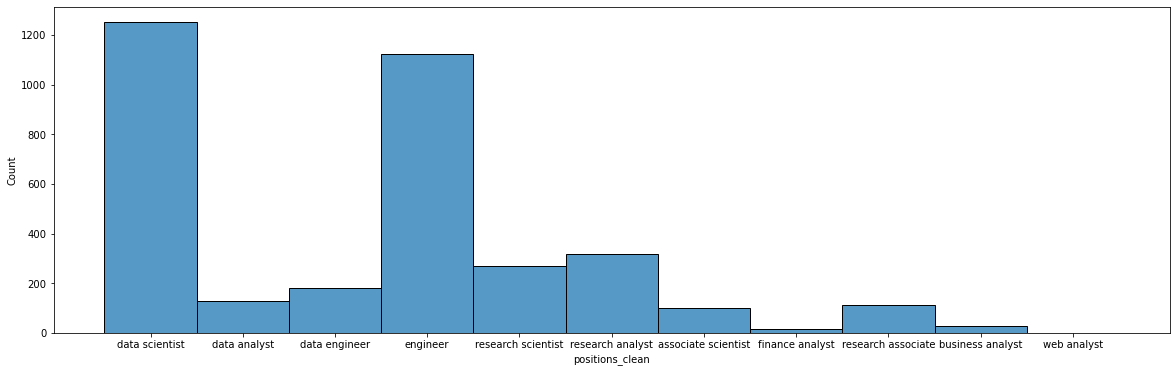

In [132]:
# Top positions
plt.figure(figsize = (20, 6))
sns.histplot(x='positions_clean', data=data )


<AxesSubplot:>

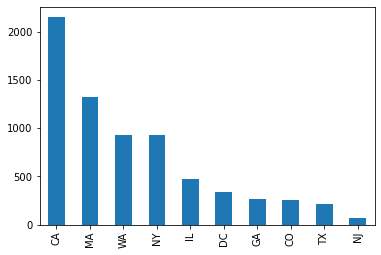

In [145]:
data['state'].value_counts().plot(kind='bar')

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 10))
sns.countplot(x = "positions_clean", hue = "seniority", data=data)
plt.ylabel("Responses")
plt.title("Responses by Sales Channel")

ValueError: Could not interpret input 'positions_clean'

<Figure size 1080x720 with 0 Axes>

ConversionError: Failed to convert value(s) to axis units: 0       GA
1       GA
2       GA
3       GA
4       GA
        ..
6959    CA
6960    CA
6961    CA
6962    CA
6963    CA
Name: x, Length: 6964, dtype: object

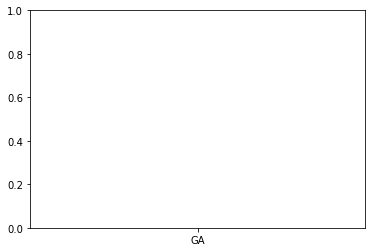

In [146]:
# Top states

sns.histplot(x='state', data=data)
plt.title('test')

In [147]:
data = data['sql'].replace(np.nan,'not specified', regex=True)

KeyError: 'sql'

In [134]:
data['python'].value_counts().plot(kind='bar')

KeyError: 'python'

In [99]:
sns.histplot(x='sql', data=data)
plt.title('test')

ValueError: Could not interpret value `sql` for parameter `x`

In [ ]:
# Top Companies

sns.histplot(y='company', data=data)
plt.title('test')

In [135]:
#Positions vs languages

plt.figure(figsize = (10, 4))
sns.countplot(x = "positions_clean", hue = "sql", data=data)
plt.ylabel("Responses")
plt.title("Responses by Sales Channel")



ValueError: Could not interpret input 'positions_clean'

<Figure size 720x288 with 0 Axes>